# Task is to first do standard scaling i.e. feature engg and then validate the model using k fold cross validation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')
data=Churn.copy()
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [15]:
#data[1:50]

Exploratory Data Analysis

In [16]:
Churn.isnull() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

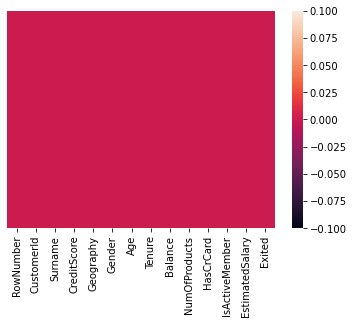

In [17]:
sns.heatmap(data.isnull(),yticklabels=False)#,cbar=True,cmap='viridis')   #no missing cases

<AxesSubplot:xlabel='Exited', ylabel='count'>

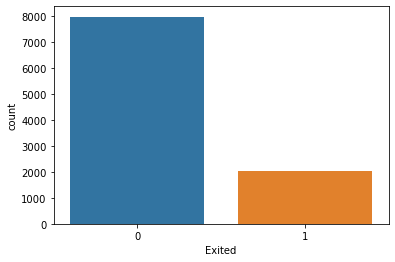

In [18]:
sns.countplot(x='Exited',data=data)

In [19]:
#as the ratio of zeros and ones are unequal, we will make it equal. It will help in increasing the accuracy of the model

In [24]:
data1= data[data.Exited==1]
#data[data.Exited==0]
data1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [23]:
data0= data[data.Exited==0].sample(len(data[data.Exited==1])) 

#taking sample from the zeros data whose length will be equal to that of ones
data0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9772,9773,15750549,Akobundu,660,Germany,Male,30,1,84440.10,2,1,1,60485.98,0
9002,9003,15610727,Ch'in,605,France,Male,36,7,128829.25,1,1,0,190588.59,0
561,562,15800440,Power,650,Spain,Male,61,1,152968.73,1,0,1,82970.69,0
9915,9916,15813140,Taylor,543,Spain,Male,41,5,0.00,2,0,1,143980.29,0
9174,9175,15628059,DeRose,529,France,Male,61,1,0.00,2,1,1,191370.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,4398,15743478,Johnson,659,Germany,Male,39,8,52106.33,2,1,1,107964.36,0
8670,8671,15758702,Watson,705,France,Female,55,8,0.00,2,1,1,14392.68,0
622,623,15636444,Craig,535,Germany,Female,53,5,141616.55,2,1,1,75888.65,0
1291,1292,15679611,Andrews,734,Spain,Female,37,2,130404.92,1,0,0,34548.74,0


In [22]:
df= pd.concat([data0,data1])  

<AxesSubplot:xlabel='Exited', ylabel='count'>

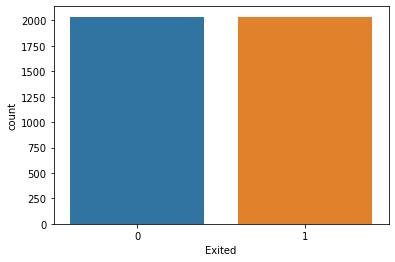

In [11]:
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

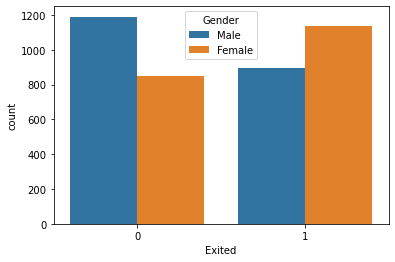

In [12]:
sns.countplot(x='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

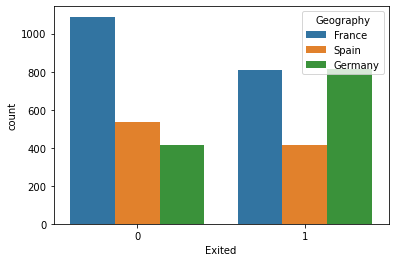

In [13]:
sns.countplot(x='Exited', hue='Geography', data=df)

Data cleaning

In [14]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
df=df.drop(to_drop,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7610,762,France,Male,36,5,119547.46,1,1,1,42693.65,0
6030,487,Spain,Male,33,8,145729.71,1,1,0,41365.85,0
7815,583,France,Male,38,8,0.00,1,1,0,47848.56,0
7070,748,France,Female,39,3,157371.54,1,0,1,97734.30,0
6718,444,France,Male,34,2,144318.97,1,1,0,112668.06,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

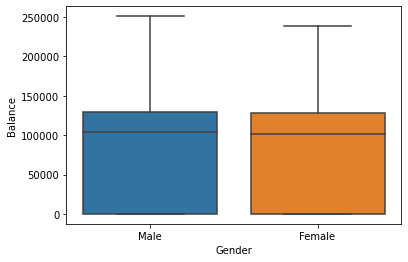

In [15]:
sns.boxplot(x='Gender',y='Balance',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

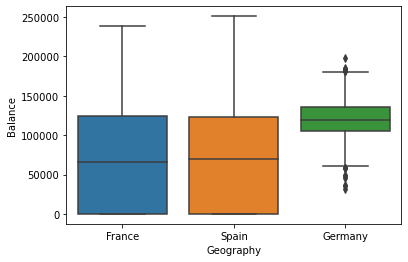

In [16]:
sns.boxplot(x='Geography',y='Balance',data=df)

##Using standardize feature engineering.

##using it for estimated salary

In [17]:
df.EstimatedSalary=(df.EstimatedSalary-df.EstimatedSalary.mean())/df.EstimatedSalary.std()
df.Balance=(df.Balance-df.Balance.mean())/df.Balance.std()
df.CreditScore=(df.CreditScore-df.CreditScore.mean())/df.CreditScore.std()

In [18]:
df.EstimatedSalary[:10]

7610   -1.008922
6030   -1.032095
7815   -0.918958
7070   -0.048346
6718    0.212280
5775   -1.087576
3891    0.750047
7959   -0.670019
6243   -0.520054
3293   -0.284978
Name: EstimatedSalary, dtype: float64

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7610,1.156806,France,Male,36,5,0.620751,1,1,1,-1.008922,0
6030,-1.640408,Spain,Male,33,8,1.045449,1,1,0,-1.032095,0
7815,-0.663926,France,Male,38,8,-1.318405,1,1,0,-0.918958,0
7070,1.014403,France,Female,39,3,1.234288,1,0,1,-0.048346,0
6718,-2.077791,France,Male,34,2,1.022565,1,1,0,0.212280,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.528520,Germany,Male,42,3,1.147802,1,1,1,-0.821285,1
9982,0.068435,Germany,Female,46,7,0.906200,1,1,0,0.255533,1
9991,-0.521523,France,Female,53,4,0.115210,1,1,0,-0.543106,1
9997,0.617707,France,Female,36,7,-1.318405,1,0,1,-1.019535,1


In [20]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(df['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [21]:
Geo.head()

,Germany,Spain
7610,0,0
6030,0,1
7815,0,0
7070,0,0
6718,0,0


In [22]:
df.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.
pd.concat([df,Gender,Geo],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
7610,1.156806,36,5,0.620751,1,1,1,-1.008922,0,1,0,0
6030,-1.640408,33,8,1.045449,1,1,0,-1.032095,0,1,0,1
7815,-0.663926,38,8,-1.318405,1,1,0,-0.918958,0,1,0,0
7070,1.014403,39,3,1.234288,1,0,1,-0.048346,0,0,0,0
6718,-2.077791,34,2,1.022565,1,1,0,0.212280,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.528520,42,3,1.147802,1,1,1,-0.821285,1,1,1,0
9982,0.068435,46,7,0.906200,1,1,0,0.255533,1,0,1,0
9991,-0.521523,53,4,0.115210,1,1,0,-0.543106,1,0,0,0
9997,0.617707,36,7,-1.318405,1,0,1,-1.019535,1,0,0,0


In [23]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7610,1.156806,36,5,0.620751,1,1,1,-1.008922,0
6030,-1.640408,33,8,1.045449,1,1,0,-1.032095,0
7815,-0.663926,38,8,-1.318405,1,1,0,-0.918958,0
7070,1.014403,39,3,1.234288,1,0,1,-0.048346,0
6718,-2.077791,34,2,1.022565,1,1,0,0.212280,0


In [24]:
##BUILDING A LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedKFold 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 


X=df.drop('Exited',axis=1)
Y=df['Exited']

for train_index, test_index in kf.split(df):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   #we take iloc as we have train index as rows
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    logmodel = LogisticRegression(solver='liblinear')  #you can keep default= blank
    
    logmodel.fit(X_train,y_train)  
    predict= logmodel.predict(X_test)
    
    print(roc_auc_score(y_test, predict))  #calculating roc scores for each model
    
predictions = logmodel.predict(X_test) 
pd.crosstab(predictions,y_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

roc_auc_score(y_test, logmodel.predict(X_test))
logmodel.predict_proba(X_test)
logmodel.predict_proba(X_test)[:,1]
logmodel.predict_proba(X_test)[:,1]>0.4
logical=logmodel.predict_proba(X_test)[:,1]>0.21

pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

roc_auc_score(y_test,pred) 
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Training and PRedicting

In [31]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [32]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,

In [33]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,292,149
1,103,271


Evaluation

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[292 103]
 [149 271]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       395
           1       0.72      0.65      0.68       420

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.6922393007836045

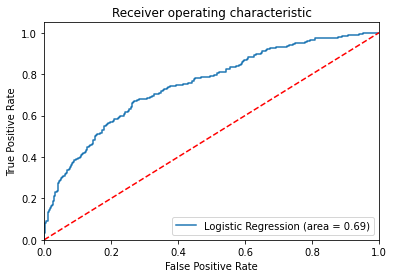

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [39]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.6922393007836045

In [40]:
logmodel.predict_proba(X_test)

array([[0.70459276, 0.29540724],
       [0.74680109, 0.25319891],
       [0.50159312, 0.49840688],
       ...,
       [0.64501924, 0.35498076],
       [0.61835677, 0.38164323],
       [0.83778565, 0.16221435]])

In [41]:
logmodel.predict_proba(X_test)[:,1]

array([0.29540724, 0.25319891, 0.49840688, 0.75930492, 0.84921498,
       0.5633018 , 0.83176731, 0.4637372 , 0.40575493, 0.72987639,
       0.2208117 , 0.81980501, 0.92413502, 0.09531647, 0.79019824,
       0.87305907, 0.55614335, 0.47996787, 0.39045806, 0.49528068,
       0.15786975, 0.2944762 , 0.22656684, 0.55379158, 0.58796471,
       0.49768459, 0.6503548 , 0.56800067, 0.46122052, 0.24850295,
       0.30801432, 0.39124182, 0.98485679, 0.76749019, 0.54801354,
       0.77613035, 0.83307811, 0.5211607 , 0.67884572, 0.74732099,
       0.19419515, 0.46607237, 0.34370401, 0.11516261, 0.64658484,
       0.4327647 , 0.6702608 , 0.44624078, 0.12420022, 0.33221907,
       0.27266409, 0.22093271, 0.25793545, 0.28050062, 0.36200465,
       0.18035524, 0.8936969 , 0.78822385, 0.89451405, 0.89024541,
       0.42410875, 0.19573882, 0.66965446, 0.3763169 , 0.94212138,
       0.60413477, 0.73058239, 0.73226924, 0.55931713, 0.73050432,
       0.86574584, 0.35781813, 0.25508701, 0.61706085, 0.57637

In [42]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,

In [43]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,

In [44]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

In [45]:
roc_auc_score(y_test,pred) 

0.5860910186859554

In [46]:
print(confusion_matrix(y_test,pred))

[[ 84 311]
 [ 17 403]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.21      0.34       395
           1       0.56      0.96      0.71       420

    accuracy                           0.60       815
   macro avg       0.70      0.59      0.52       815
weighted avg       0.69      0.60      0.53       815



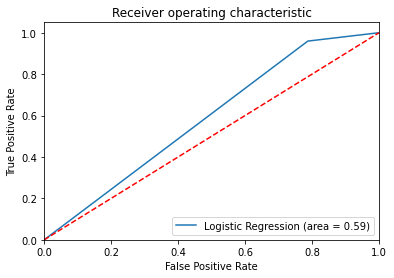

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()